# dff from past year <br>
sources: <br>
https://fred.stlouisfed.org/series/DFF

In [7]:
import pandas as pd

dff_one_year = pd.read_csv('DFF_one_year.csv',header='infer')
dff_one_year.head()

,DATE,DFF
0,2019-03-12,2.4
1,2019-03-13,2.4
2,2019-03-14,2.4
3,2019-03-15,2.4
4,2019-03-16,2.4


# s&p data since 2009 <br>
sources: <br>
https://finance.yahoo.com/quote/%5EGSPC/history/

In [8]:
sp = pd.read_csv('s&p.csv',header='infer')
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-03-16,758.840027,774.530029,753.369995,753.890015,753.890015,7883540000
1,2009-03-17,753.880005,778.119995,749.929993,778.119995,778.119995,6156800000
2,2009-03-18,776.010010,803.039978,765.640015,794.349976,794.349976,9098450000
3,2009-03-19,797.919983,803.239990,781.820007,784.039978,784.039978,9033870000
4,2009-03-20,784.580017,788.909973,766.200012,768.539978,768.539978,7643720000


# treasury yeild data <br>
sources: <br>
https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2020

In [9]:
yeild_10 = pd.read_csv('yeild_2010.csv',header='infer')
yeild_10.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/4/2010,0.05,NaN,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
1,1/5/2010,0.03,NaN,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2,1/6/2010,0.03,NaN,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
3,1/7/2010,0.02,NaN,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
4,1/8/2010,0.02,NaN,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70


In [10]:
yeild_11 = pd.read_csv('yeild_2011.csv',header='infer')
yeild_11.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/3/2011,0.11,NaN,0.15,0.19,0.29,0.61,1.03,2.02,2.74,3.36,4.18,4.39
1,1/4/2011,0.12,NaN,0.14,0.19,0.28,0.63,1.04,2.01,2.72,3.36,4.21,4.44
2,1/5/2011,0.13,NaN,0.14,0.19,0.31,0.71,1.16,2.14,2.86,3.50,4.34,4.55
3,1/6/2011,0.13,NaN,0.15,0.18,0.30,0.68,1.11,2.09,2.80,3.44,4.31,4.53
4,1/7/2011,0.13,NaN,0.14,0.18,0.29,0.60,1.02,1.96,2.69,3.34,4.25,4.48


In [11]:
yeild_12 = pd.read_csv('yeild_2012.csv',header='infer')
yeild_12.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/3/2012,0.01,NaN,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98
1,1/4/2012,0.01,NaN,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03
2,1/5/2012,0.01,NaN,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06
3,1/6/2012,0.02,NaN,0.02,0.05,0.12,0.25,0.40,0.86,1.40,1.98,2.70,3.02
4,1/9/2012,0.01,NaN,0.01,0.05,0.11,0.26,0.38,0.85,1.39,1.98,2.70,3.02


In [12]:
yeild_13 = pd.read_csv('yeild_2013.csv',header='infer')
yeild_13.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2013,0.07,NaN,0.08,0.12,0.15,0.27,0.37,0.76,1.25,1.86,2.63,3.04
1,1/3/2013,0.06,NaN,0.08,0.12,0.15,0.27,0.40,0.81,1.31,1.92,2.70,3.12
2,1/4/2013,0.06,NaN,0.07,0.11,0.15,0.27,0.41,0.82,1.32,1.93,2.70,3.10
3,1/7/2013,0.05,NaN,0.07,0.11,0.15,0.27,0.41,0.82,1.31,1.92,2.70,3.10
4,1/8/2013,0.06,NaN,0.07,0.11,0.14,0.25,0.38,0.79,1.28,1.89,2.66,3.06


In [13]:
yeild_14 = pd.read_csv('yeild_2014.csv',header='infer')
yeild_14.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2014,0.01,NaN,0.07,0.09,0.13,0.39,0.76,1.72,2.41,3.00,3.68,3.92
1,1/3/2014,0.02,NaN,0.07,0.10,0.13,0.41,0.80,1.73,2.42,3.01,3.69,3.93
2,1/6/2014,0.01,NaN,0.05,0.08,0.12,0.40,0.78,1.70,2.38,2.98,3.66,3.90
3,1/7/2014,0.01,NaN,0.04,0.08,0.13,0.40,0.80,1.69,2.37,2.96,3.64,3.88
4,1/8/2014,0.00,NaN,0.05,0.08,0.13,0.43,0.87,1.77,2.44,3.01,3.67,3.90


In [14]:
yeild_15 = pd.read_csv('yeild_2015.csv',header='infer')
yeild_15.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2015,0.02,NaN,0.02,0.11,0.25,0.66,1.07,1.61,1.92,2.12,2.41,2.69
1,1/5/2015,0.02,NaN,0.03,0.10,0.26,0.68,1.06,1.57,1.85,2.04,2.32,2.60
2,1/6/2015,0.02,NaN,0.03,0.10,0.25,0.65,1.02,1.50,1.78,1.97,2.25,2.52
3,1/7/2015,0.02,NaN,0.03,0.09,0.25,0.62,1.00,1.47,1.76,1.96,2.25,2.52
4,1/8/2015,0.01,NaN,0.03,0.08,0.23,0.62,1.00,1.50,1.81,2.03,2.33,2.59


In [15]:
yeild_16 = pd.read_csv('yeild_2016.csv',header='infer')
yeild_16.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/4/2016,0.17,NaN,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.64,2.98
1,1/5/2016,0.20,NaN,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,2.67,3.01
2,1/6/2016,0.21,NaN,0.21,0.47,0.67,0.99,1.26,1.65,1.98,2.18,2.59,2.94
3,1/7/2016,0.20,NaN,0.20,0.46,0.66,0.96,1.22,1.61,1.94,2.16,2.56,2.92
4,1/8/2016,0.20,NaN,0.20,0.45,0.64,0.94,1.20,1.57,1.91,2.13,2.55,2.91


In [16]:
yeild_17 = pd.read_csv('yeild_2017.csv',header='infer')
yeild_17.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/3/2017,0.52,NaN,0.53,0.65,0.89,1.22,1.50,1.94,2.26,2.45,2.78,3.04
1,1/4/2017,0.49,NaN,0.53,0.63,0.87,1.24,1.50,1.94,2.26,2.46,2.78,3.05
2,1/5/2017,0.51,NaN,0.52,0.62,0.83,1.17,1.43,1.86,2.18,2.37,2.69,2.96
3,1/6/2017,0.50,NaN,0.53,0.61,0.85,1.22,1.50,1.92,2.23,2.42,2.73,3.00
4,1/9/2017,0.50,NaN,0.50,0.60,0.82,1.21,1.47,1.89,2.18,2.38,2.69,2.97


In [17]:
yeild_18 = pd.read_csv('yeild_2018.csv',header='infer')
yeild_18.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2018,1.29,NaN,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81
1,1/3/2018,1.29,NaN,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78
2,1/4/2018,1.28,NaN,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79
3,1/5/2018,1.27,NaN,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81
4,1/8/2018,1.30,NaN,1.45,1.60,1.79,1.96,2.07,2.29,2.41,2.49,2.65,2.81


In [18]:
yeild_19 = pd.read_csv('yeild_2019.csv',header='infer')
yeild_19.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2019,2.40,2.40,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1,1/3/2019,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2,1/4/2019,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
3,1/7/2019,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
4,1/8/2019,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00


In [19]:
yeild_20 = pd.read_csv('yeild_2020.csv',header='infer')
yeild_20.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1/2/2020,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,1/3/2020,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,1/6/2020,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,1/7/2020,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,1/8/2020,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35


# real gdp data from past 10 years <br>
sources: <br>
https://fred.stlouisfed.org/series/GDPC1

In [20]:
real_gdp = pd.read_csv('read_gdp.csv',header='infer')
real_gdp.head()

,DATE,GDPC1
0,2009-10-01,15356.058
1,2010-01-01,15415.145
2,2010-04-01,15557.277
3,2010-07-01,15671.967
4,2010-10-01,15750.625


In [21]:
print("hi")

hi


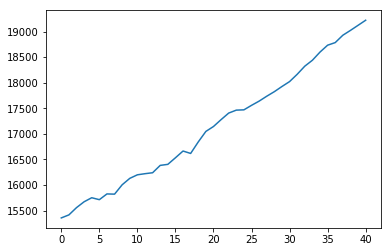

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(real_gdp["GDPC1"])

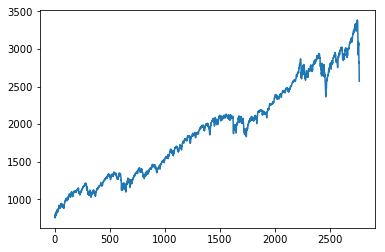

In [28]:
plt.plot(sp["Open"])